# Real Estate Clean up

This is a real dataset and it was downloaded using web scraping techniques. The data contains registers from fotocasa which is one of the most popular websites of real estate in Spain. Please, do not do this (web scraping) unless it is for academic purposes.

The dataset was downloaded a few years ago by Henry Navarro and In no case were economic returns obtained from it.

It contains thousands of data from real houses published on the web www.fotocasa.com. Your goal is to extract as much information as possible with the knowledge you have so far about data science, for example what is the most expensive house in the entire dataset?

Let's start with precisely that question... Good luck!

#### Exercise 00. Read the dataset assets/real_estate.csv and try to visualize the table (★☆☆)

In [1]:
import pandas as pd

# this CSV file contains semicolons instead of comas as separator
ds = pd.read_csv('assets/real_estate.csv', sep=';')
ds

print(ds.columns)

print(ds.head())


/tmp/ipykernel_834/2400710209.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Index(['Unnamed: 0', 'id_realEstates', 'isNew', 'realEstate_name',
       'phone_realEstate', 'url_inmueble', 'rooms', 'bathrooms', 'surface',
       'price', 'date', 'description', 'address', 'country', 'level1',
       'level2', 'level3', 'level4', 'level5', 'level6', 'level7', 'level8',
       'upperLevel', 'countryId', 'level1Id', 'level2Id', 'level3Id',
       'level4Id', 'level5Id', 'level6Id', 'level7Id', 'level8Id', 'accuracy',
       'latitude', 'longitude', 'zipCode', 'customZone'],
      dtype='object')
   Unnamed: 0  id_realEstates  isNew                    realEstate_name  \
0           1       153771986  False            ferrari 57 inmobiliaria   
1           2       153867863  False  tecnocasa fuenlabrada ferrocarril   
2           3       153430440  False                 look find boadilla   
3           4       152776331  False  tecnocasa fuenlabrada ferrocarril   
4           5       153180188  False            ferrari 57 inmobiliaria   

   phone_realEstate          

#### Exercise 01. Which is the most expensive house in the dataset? (★☆☆)

Print the address and the price of the selected house. For example:

`The house with address General Street Nº5 is the most expensive and its price is 5000000 USD`

In [2]:

max_price , max_price_index = ds['price'].max(),ds['price'].idxmax()

max_price_address = ds.loc[max_price_index,'address']

print("The house with address " + str(max_price_address) + " is the most expensive and its price is " + str(max_price) + " USD")


The house with address El Escorial is the most expensive and its price is 8500000 USD


#### Exercise 02. Which is cheapest house in the dataset? (★☆☆)

Print the address and the price of the selected house. For example:

`The house with address Concrete Street Nº1 is the cheapest and its price is 12000 USD`

In [3]:
# Filtering list assuming that no price can be zero and those cases are just missing information
ds_filtered = ds[ds['price'] > 0]

min_price, min_price_index = ds_filtered['price'].min(), ds_filtered['price'].idxmin()

min_price_address = ds_filtered.loc[min_price_index, 'address']

# Version two just for verification purposes
# min_price_address_two = ds_filtered['address'][min_price_index]
# print(min_price_address_two)

print('The house with address ' + str(min_price_address) + ' is the cheapest and its price is ' + str(min_price) + " USD. I want two please! Wilkommen Deutschland")

The house with address Berlin, Coslada is the cheapest and its price is 600 USD. I want two please! Wilkommen Deutschland


#### Exercise 03. Which is the biggest and the smallest house in the dataset? (★☆☆)

Print both the address and the surface of the selected houses. For example:

`The bigger house is located on Yukka Street Nº10 and its surface is 5000 meters`

`The smaller house is located on County Road 1 N and its surface is 200 meters`

In [4]:
ds = pd.read_csv('assets/real_estate.csv', sep=';')

ds_filtered = ds[ds['surface'] > 0]

# Max and min Surfaces and their rows
max_surface, max_surface_row = ds_filtered['surface'].max(), ds_filtered['surface'].idxmax()

min_surface, min_surface_row = ds_filtered['surface'].min(), ds_filtered['surface'].idxmin()

# their addresses variables

max_surface_address = ds_filtered.loc[max_surface_row,'address']

min_surface_address = ds_filtered.loc[min_surface_row,'address']

# Max and minimum Surfaces

print('The bigger house is located on ' + str(max_surface_address) +' and its surface is ' + str(max_surface) + ' meters')

print('The smaller house is located on ' + str(min_surface_address) +  ' and its surface is ' + str(min_surface) + ' meters')


The bigger house is located on Sevilla la Nueva and its surface is 249000.0 meters
The smaller house is located on Calle Amparo,  Madrid Capital and its surface is 15.0 meters


#### Exercise 04. How many populations (level5 column) the dataset contains? (★☆☆)

Print the name of the populations with comma as separator. For example:

`> print(populations)`

`population1, population2, population3,...`

In [5]:

# level5= ds['level5'].value_counts()

populations = ds['level5'].value_counts()

populations_string = ', '.join(f'{index}: {count}' for index, count in populations.items())
print(populations_string)


 Madrid Capital: 6643, Alcalá de Henares: 525, Las Rozas de Madrid: 383, Móstoles: 325, Getafe: 290, San Sebastián de los Reyes: 280, Boadilla del Monte: 275, Parla: 272, Valdemoro: 262, Torrejón de Ardoz: 261, Pozuelo de Alarcón: 259, Alcobendas: 259, Fuenlabrada: 233, Collado Villalba: 230, Arganda del Rey: 206, Leganés: 194, Alcorcón: 190, Coslada: 185, Villaviciosa de Odón: 166, Pinto: 156, Majadahonda: 148, Aranjuez: 144, Arroyomolinos (Madrid): 137, Rivas-vaciamadrid: 119, Torrelodones: 101, Navalcarnero: 100, Ciempozuelos: 86, El Escorial: 86, Galapagar: 84, Velilla de San Antonio: 84, Moralzarzal: 81, San Lorenzo de El Escorial: 80, Villanueva de la Cañada: 76, Villanueva del Pardillo: 71, San Martín de la Vega: 67, El Álamo: 66, Colmenar Viejo: 66, Villalbilla: 64, Miraflores de la Sierra: 62, Humanes de Madrid: 61, Alpedrete: 60, Valdemorillo: 58, Mejorada del Campo: 54, Torrejón de la Calzada: 53, Guadarrama: 50, Paracuellos de Jarama: 50, Meco: 48, San Fernando de Henares: 

#### Exercise 05. Does the dataset contain NAs? (★☆☆)

Print a boolean value (`true` or `fase`) followed by the rows/cols that contains NAs.

In [6]:
# Locate NaN values in the DataFrame
nan_locations = ds.isna()

# Select rows with NaN values
rows_with_nan = ds[ds.isna().any(axis=1)]

# Select columns with NaN values
columns_with_nan = ds.loc[:, ds.isna().any()]

# Result

print("\nRows with NaN values:\n", rows_with_nan.count())
print("\nColumns with NaN values:\n", columns_with_nan.count())

print("\nRows with NaN values:\n", rows_with_nan)
print("\nColumns with NaN values:\n", columns_with_nan)



Rows with NaN values:
 Unnamed: 0          15335
id_realEstates      15335
isNew               15335
realEstate_name     15325
phone_realEstate    14541
url_inmueble        15335
rooms               14982
bathrooms           14990
surface             14085
price               15335
date                15335
description         15193
address             15335
country             15335
level1              15335
level2              15335
level3              15335
level4               8692
level5              15335
level6                708
level7              13058
level8               6756
upperLevel          15335
countryId           15335
level1Id            15335
level2Id            15335
level3Id            15335
level4Id            15335
level5Id            15335
level6Id            15335
level7Id            15335
level8Id            15335
accuracy            15335
latitude            15335
longitude           15335
zipCode                 0
customZone              0
dtype: int64



#### Exercise 06. Delete the NAs of the dataset, if applicable (★★☆)

Print a comparison between the dimensions of the original DataFrame versus the DataFrame after the deletions

In [7]:
ds_size = ds.shape

ds_cleaned_no_nas = ds.dropna(axis=0).dropna(axis=1)

# ds_cleaned_columns = ds.dropna(axis=1)

ds_size_after_cleanup = ds_cleaned_no_nas.shape

print('Standard dataset size: ' , ds_size)

print('Size after removis NAs: ' , ds_size_after_cleanup)

Standard dataset size:  (15335, 37)
Size after removis NAs:  (0, 37)


#### Exercise 07. Which is the mean of prices in the population (level5 column) of "Arroyomolinos (Madrid)"? (★★☆)

Print the obtained value

In [8]:
arroyomolinos_prices = ds.loc[ds['level5'] == 'Arroyomolinos (Madrid)', 'price']

arroyomolinos_prices_mean = arroyomolinos_prices.mean()

print('Mean of prices of properties on Arroyomolinos (Madrid): ' + str(arroyomolinos_prices_mean) + ' *USD(assuming currency) based on a population of ' + str(arroyomolinos_prices.count()) + ' properties')

Mean of prices of properties on Arroyomolinos (Madrid): 294541.59854014596 *USD(assuming currency) based on a population of 137 properties


#### Exercise 08. Plot the histogram of prices for the population (level5 column) of "Arroyomolinos (Madrid)" and explain what you observe (★★☆)

Print the histogram of the prices and write in the Markdown cell a brief analysis about the plot.

0


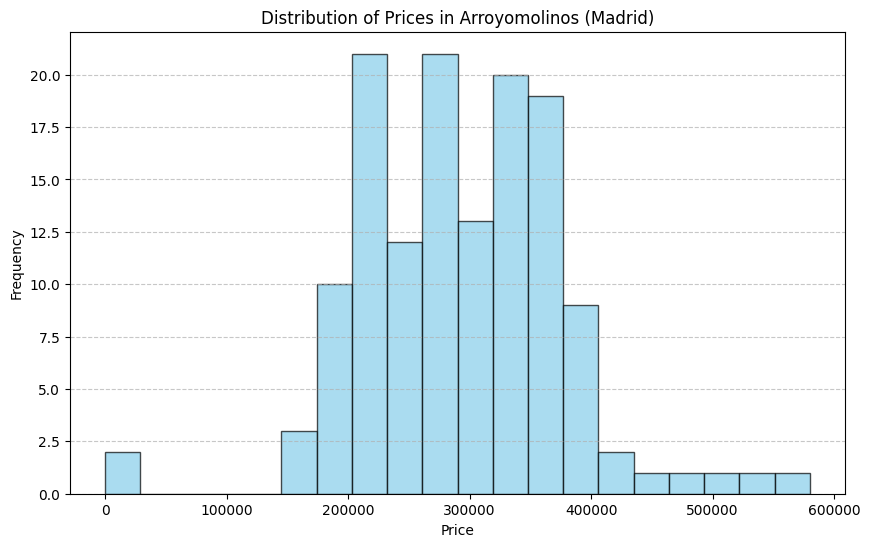

In [9]:
import matplotlib.pyplot as plt

# obtaining additional information to understand graph better
print(arroyomolinos_prices.min())

# Plotting a histogram
plt.figure(figsize=(10, 6))
plt.hist(arroyomolinos_prices, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Prices in Arroyomolinos (Madrid)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

1. The center of the distribution matches with the mean obtained of 294541.59. 
     2. The majority of properties in Arroyomolinos fall between 200k and 380k, indicating a concentration within this price range. 
     3. Less than 10% of properties are more than 400k 
     4. there is an outlier with price = 0 that migth be worth investigating 
     5. The distribution resembles a standard distribution, even tough there is a slightly skewness to the left, indicating most properties lie before the average

#### Exercise 09. Are the averages of "Valdemorillo" and "Galapagar" prices the same? (★★☆)

Print the both average prices and then write a conclusion about them

In [10]:
valdemorillo_prices = ds.loc[ds['level5'] == 'Valdemorillo', 'price']

valdemorillo_prices_mean = valdemorillo_prices.mean()

galapagar_prices =ds.loc[ds['level5'] == 'Galapagar', 'price']

galapagar_prices_mean =galapagar_prices.mean()

print('Valdemorillo average prices: ', valdemorillo_prices_mean)
print('Galapagar average prices: ', galapagar_prices_mean)

# Conclusion

print("""In conclusion, it looks like Valdemorillo and Galapagar prices are very similar, with Valdemorillo being about $3.8 k *USD higher. 
    However, analysis of additional parameters would be needed to understand what type of properties will you get for that price""")

Valdemorillo average prices:  363860.2931034483
Galapagar average prices:  360063.20238095237
In conclusion, it looks like Valdemorillo and Galapagar prices are very similar, with Valdemorillo being about $3.8 k *USD higher. 
    However, analysis of additional parameters would be needed to understand what type of properties will you get for that price


#### Exercise 10. Are the averages of "Valdemorillo" and "Galapagar" price per square meter (price/m2) the same? (★★☆)

Print the both average prices and then write a conclusion about

Hint: Create a new column called `pps` (price per square) and then analyse the values

In [11]:
valdemorillo_surface_mean = ds.loc[ds['level5'] == 'Valdemorillo', 'surface'].mean()

price_by_m2_valdemorillo = valdemorillo_prices_mean/valdemorillo_surface_mean

galapagar_surface_mean = ds.loc[ds['level5'] == 'Galapagar', 'surface'].mean()

price_by_m2_galapagar = galapagar_prices_mean/galapagar_surface_mean

ds['price_per_m2'] = ds['price'] / ds['surface']

print('Valdemorillo price per square meter (price/m2) average is ' + str(price_by_m2_valdemorillo))

print('Galapagar price per square meter (price/m2) average is ' + str(price_by_m2_galapagar))

print("Conclusion: Valdemorillo turned out to be a bit more affordable, per square meter, as opposed as the initial hypothesis.")



Valdemorillo price per square meter (price/m2) average is 1039.5447972876266
Galapagar price per square meter (price/m2) average is 1178.5257998852853
Conclusion: Valdemorillo turned out to be a bit more affordable, per square meter, as opposed as the initial hypothesis.


#### Exercise 11. Analyse the relation between the surface and the price of the houses (★★☆)

Hint: You can make a `scatter plot` and then write a conclusion about it

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


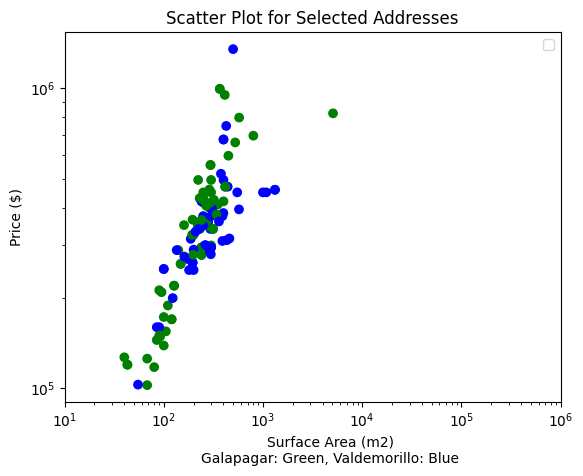

In [12]:
import matplotlib.pyplot as plt

# Filter DataFrame for the chosen addresses
filtered_ds = ds[ds['level5'].isin(['Valdemorillo', 'Galapagar'])]

# Define colors for each address
color_mapping = {'Valdemorillo': 'blue', 'Galapagar': 'green'}

# Map the 'address' column to colors
colors = filtered_ds['level5'].map(color_mapping)

# Plotting
x = filtered_ds['surface']
y = filtered_ds['price']
plt.scatter(x, y, c=colors)
plt.title('Scatter Plot for Selected Addresses')
plt.xlabel("""        Surface Area (m2)
        Galapagar: Green, Valdemorillo: Blue""")
plt.ylabel('Price ($)')
plt.xlim(10, 1000000)
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.show()


There is a small tendency for houses in Galapagar to be more expensive per square meter while Valdemorillo has more variety of "affordable" larger houses. 

#### Exercise 12. How many real estate agencies the dataset contains? (★★☆)

Print the obtained value

In [13]:
realEstate_name_agencies = ds['realEstate_name'].value_counts()
print(realEstate_name_agencies)

realEstate_name
engel volkers madrid    470
infocasa consulting     300
outletdeviviendas       260
housell                 250
solvia inmobiliaria     207
                       ... 
javier garcia             1
ir inmobiliaria           1
jesus                     1
julio                     1
nieves                    1
Name: count, Length: 1821, dtype: int64


#### Exercise 13. Which is the population (level5 column) that contains the most houses? (★★☆)

Print both the population and the number of houses

In [14]:
number_of_houses = ds['level5'].value_counts().max()
most_houses_population_name = ds['level5'].value_counts().idxmax()

print('The population with most houses is' + str(most_houses_population_name) + ' with ' + str(number_of_houses) + ' houses in total. ')


The population with most houses is Madrid Capital with 6643 houses in total. 


#### Exercise 14. Now let's work with the "south belt" of madrid. Make a subset of the original DataFrame that contains the following populations (level5 column): "Fuenlabrada","Leganés","Getafe","Alcorcón" (★★☆)

Hint: Filter the original DataFrame using the column `level5` and the function `isin`

In [15]:
mask = ds['level5'].isin(["Fuenlabrada","Leganés","Getafe","Alcorcón"])

# value_counts, nunique, unique

# print(mask.unique())

south_belt_madrid_ds = ds[mask]

ds['level5']

south_belt_madrid_ds['level5'].value_counts()

print(south_belt_madrid_ds['level5'].value_counts(),south_belt_madrid_ds['level5'].unique(),'nunique:',south_belt_madrid_ds['level5'].nunique())

# print(south_belt_madrid_ds)

level5
Getafe         290
Fuenlabrada    233
Leganés        194
Alcorcón       190
Name: count, dtype: int64 ['Fuenlabrada' 'Alcorcón' 'Leganés' 'Getafe'] nunique: 4


#### Exercise 15. Make a bar plot of the median of the prices and explain what you observe (you must use the subset obtained in the question 14) (★★★)

Print the bar of the median of the prices and write in the Markdown cell a brief analysis about the plot

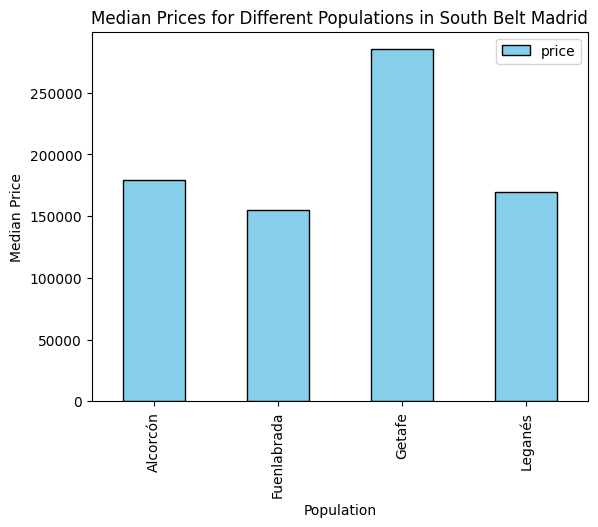

In [16]:

median_prices = south_belt_madrid_ds.groupby('level5')['price'].median()

# Bar plot
median_prices.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Median Prices for Different Populations in South Belt Madrid')
plt.xlabel('Population')
plt.legend()
plt.ylabel('Median Price')
plt.show()

The cost of buying a house is the highest in Getafe. THe remaining populations have in average the same price. 

#### Exercise 16. Calculate the sample mean and variance of the variables: price, rooms, surface area and bathrooms (you must use the subset obtained in the question 14) (★★★)

Print both values for each variable

In [17]:
south_belt_madrid_price_mean = south_belt_madrid_ds['price'].mean()
south_belt_madrid_price_variance = south_belt_madrid_ds['price'].var()

south_belt_madrid_rooms_mean = south_belt_madrid_ds['rooms'].mean()
south_belt_madrid_rooms_variance = south_belt_madrid_ds['rooms'].var()

south_belt_madrid_surface_mean = south_belt_madrid_ds['surface'].mean()
south_belt_madrid_surface_variance = south_belt_madrid_ds['surface'].var()

south_belt_madrid_bathrooms_mean = south_belt_madrid_ds['bathrooms'].mean()
south_belt_madrid_bathrooms_variance = south_belt_madrid_ds['bathrooms'].var()

print('south_belt_madrid_price_mean:', south_belt_madrid_price_mean)
print('south_belt_madrid_price_variance: ',south_belt_madrid_price_variance)
print('south_belt_madrid_rooms_mean: ', south_belt_madrid_rooms_mean)
print('south_belt_madrid_rooms_variance: ', south_belt_madrid_rooms_variance)
print('south_belt_madrid_surface_mean: ', south_belt_madrid_surface_mean)
print('south_belt_madrid_surface_variance:', south_belt_madrid_surface_variance)
print('south_belt_madrid_bathrooms_mean: ', south_belt_madrid_bathrooms_mean)
print('south_belt_madrid_bathrooms_variance: ', south_belt_madrid_bathrooms_variance)




south_belt_madrid_price_mean: 223094.48070562293
south_belt_madrid_price_variance:  14921367508.04902
south_belt_madrid_rooms_mean:  3.0177383592017737
south_belt_madrid_rooms_variance:  0.7188858892927542
south_belt_madrid_surface_mean:  111.75222363405337
south_belt_madrid_surface_variance: 4263.051760316337
south_belt_madrid_bathrooms_mean:  1.633221850613155
south_belt_madrid_bathrooms_variance:  0.5717968625577321


#### Exercise 17. What is the most expensive house of each population? You must use the subset obtained in the question 14 (★★☆)

Print both the address and the price of the selected house of each population. You can print a DataFrame or a single line for each population

In [18]:
max_price_perpop,max_price_perpop_index = south_belt_madrid_ds.groupby('level5')['price'].max(),south_belt_madrid_ds.groupby('level5')['price'].idxmax()
# max_price_perpop_address = south_belt_madrid_ds[south_belt_madrid_ds[max_price_perpop_index],['address','level5']]

# Get the corresponding rows using the index
max_price_perpop_rows = south_belt_madrid_ds.loc[max_price_perpop_index, ['address', 'level5', 'price','bathrooms']]

# print(max_price_perpop)
print(max_price_perpop_rows)

                                     address       level5    price  bathrooms
5585                                Alcorcón     Alcorcón   950000        6.0
11561  Calle de Paulo Freire, 5, Fuenlabrada  Fuenlabrada   490000        3.0
2881                                  Getafe       Getafe  1050000        4.0
10412           Avenida Reina Sofía, Leganés      Leganés   650000        5.0


#### Exercise 18. Normalize the variable of prices for each population and plot the 4 histograms in the same plot (you must use the subset obtained in the question 14) (★★★)

For the normalization method you can use the one you consider to, there is not a single correct answer to this question. Print the plot and write in the Markdown cell a brief analysis about the plot

Hint: You can help yourself reviewing the multihist demo of Matplotlib

            level5   price  normalized_price
1      Fuenlabrada   89000         -1.286361
3      Fuenlabrada   89000         -1.286361
85        Alcorcón  107000         -0.974552
94         Leganés  320000          1.019853
109       Alcorcón  425000          1.543567
...            ...     ...               ...
15275  Fuenlabrada  138000         -0.571700
15291      Leganés  279000          0.644227
15305  Fuenlabrada  170000         -0.104983
15322  Fuenlabrada  112000         -0.950908
15325  Fuenlabrada  215000          0.551339

[907 rows x 3 columns]


/tmp/ipykernel_834/3738612519.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_belt_madrid_ds['normalized_price'] = south_belt_madrid_ds.groupby('level5')['price'].transform(lambda x: (x - x.mean()) / x.std())


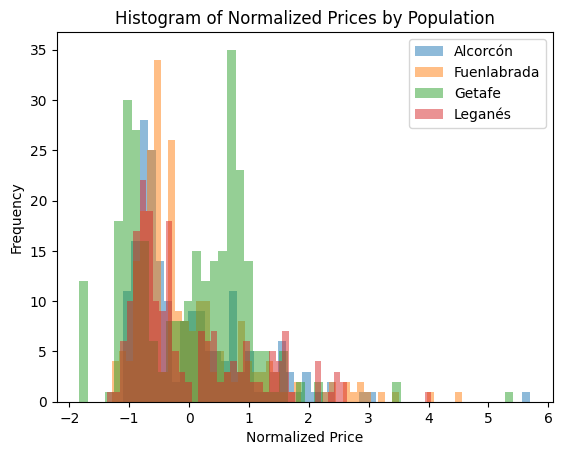

In [19]:
# Group by 'level5' and normalize the 'price' variable using Z-score
south_belt_madrid_ds['normalized_price'] = south_belt_madrid_ds.groupby('level5')['price'].transform(lambda x: (x - x.mean()) / x.std())

# Print the result
print(south_belt_madrid_ds[['level5', 'price', 'normalized_price']])

# Iterate through each population group and plot histogram
for population, data in south_belt_madrid_ds.groupby('level5'):
    plt.hist(data['normalized_price'], label=population, bins=50, alpha=0.5)

# Add labels and title
plt.xlabel('Normalized Price')
plt.ylabel('Frequency')
plt.title('Histogram of Normalized Prices by Population')
plt.legend()

Most houses in South Belt Madrid are priced around 190k and showing the same tendency for amount of more expensive properties, especially above 300k. Getafe has the highest number of houses sold around 300k. 

#### Exercise 19. What can you say about the price per square meter (price/m2) between the towns of "Getafe" and "Alcorcón"? You must use the subset obtained in the question 14 (★★☆)

Hint: Create a new column called `pps` (price per square) and then analyse the values

         level5   price  surface          pps
85     Alcorcón  107000     50.0  2140.000000
109    Alcorcón  425000    142.0  2992.957746
169      Getafe  290000    195.0  1487.179487
232      Getafe  137400     65.0  2113.846154
233      Getafe  135500     83.0  1632.530120
...         ...     ...      ...          ...
15117    Getafe  412500    140.0  2946.428571
15144  Alcorcón  330000     93.0  3548.387097
15166  Alcorcón  175000     73.0  2397.260274
15191  Alcorcón  318000    102.0  3117.647059
15223  Alcorcón  257000     85.0  3023.529412

[480 rows x 4 columns]


/tmp/ipykernel_834/577368377.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_belt_madrid_ds['pps'] = ds['price'] / ds['surface']


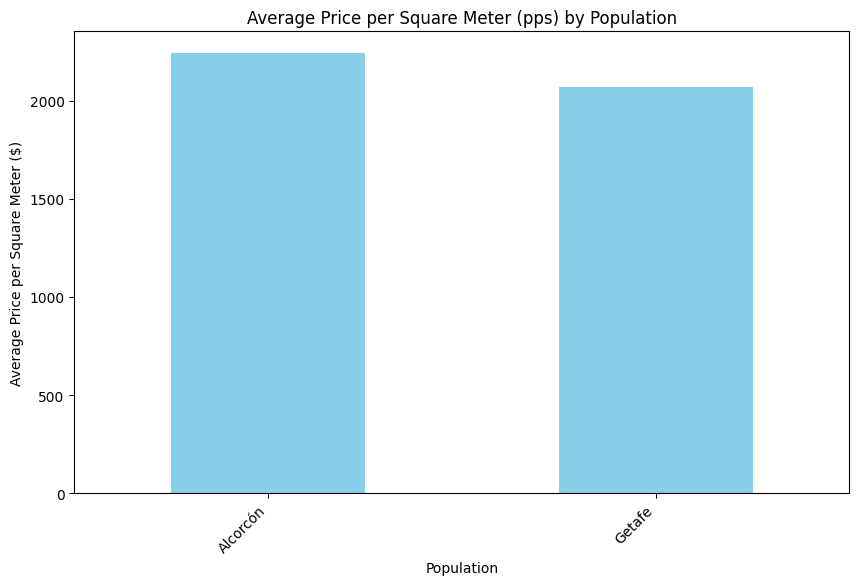

In [20]:
south_belt_madrid_ds['pps'] = ds['price'] / ds['surface']

# Create a list of the populations you want to filter
selected_populations = ['Getafe', 'Alcorcón']

# Use the correct list in isin
filtered_data = south_belt_madrid_ds[south_belt_madrid_ds['level5'].isin(selected_populations)]

# Print the result
print(filtered_data[['level5', 'price', 'surface', 'pps']])

# Group by 'level5' and calculate the mean of 'pps' for each population
pps_means = filtered_data.groupby('level5')['pps'].mean()

# Plot a bar chart
plt.figure(figsize=(10, 6))
pps_means.plot(kind='bar', color='skyblue')
plt.title('Average Price per Square Meter (pps) by Population')
plt.xlabel('Population')
plt.ylabel('Average Price per Square Meter ($)')
plt.xticks(rotation=45, ha='right')
plt.show()

#### Exercise 20. Make the same plot for 4 different populations (level5 column) and rearrange them on the same graph? You must use the subset obtained in the question 14 (★★☆) 
Hint: make a scatter plot of each population using subplots.

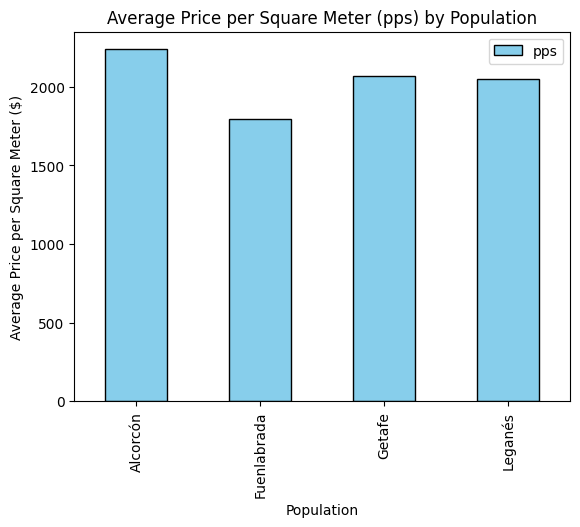

In [21]:
# Group by 'level5' and calculate the mean of 'pps' for each population
pps_means_south_belt = south_belt_madrid_ds.groupby('level5')['pps'].mean()

# Bar plot
pps_means_south_belt.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Price per Square Meter (pps) by Population')
plt.xlabel('Population')
plt.ylabel('Average Price per Square Meter ($)')

plt.legend()
plt.show()



#### Exercise 21. Make a plot of the coordinates (latitude and longitude columns) of the south belt of Madrid by color of each population (you must use the subset obtained in the question 14) (★★★★)

Execute the following cell and then start coding in the next one. You must implement a simple code that transform the coordinates columns in a Python dictionary (add more information if needed) and then add it to the map

In [28]:
from ipyleaflet import Map, basemaps

# Map centered on (60 degrees latitude et -2.2 degrees longitude)
# Latitude, longitude
map = Map(center=(60, -2.2), zoom=2, min_zoom=1, max_zoom=20, basemap=basemaps.Stamen.Terrain)
map

AttributeError: Stamen

In [ ]:
## HERE: plot the coordinates of the estates

## PUT HERE YOUR CODE:
